
--- Scenario 1: AI vs Human Text Classification Setup ---
GPT.csv and human.csv loaded successfully.

Training Multinomial Naive Bayes for AI vs Human classification...
--- Results for Multinomial Naive Bayes ---
Accuracy: 0.7392
Classification Report:
              precision    recall  f1-score   support

       Human       0.74      0.73      0.74      1250
         GPT       0.73      0.75      0.74      1250

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500



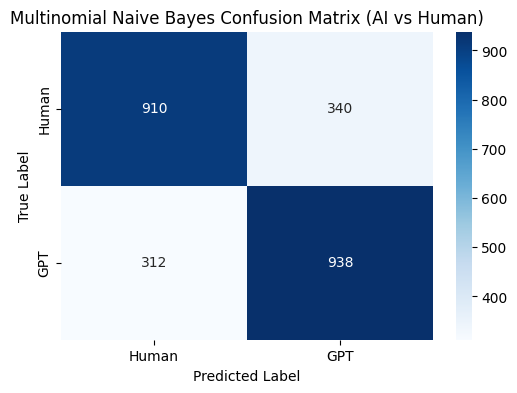

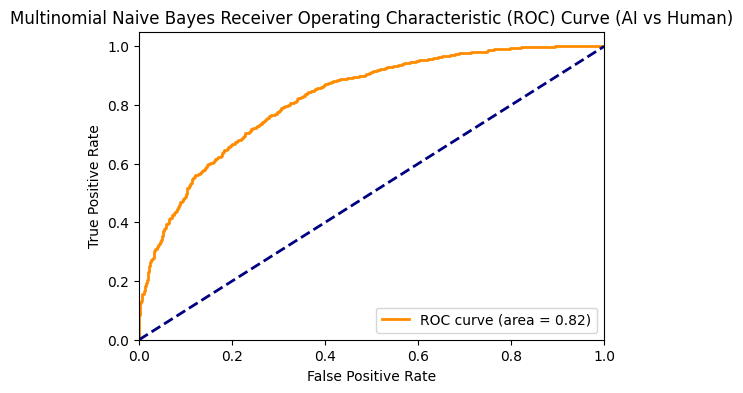


Training Logistic Regression for AI vs Human classification...
--- Results for Logistic Regression ---
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

       Human       0.77      0.72      0.74      1250
         GPT       0.73      0.78      0.76      1250

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500



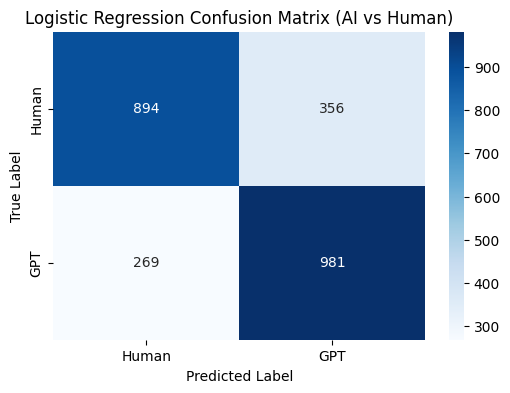

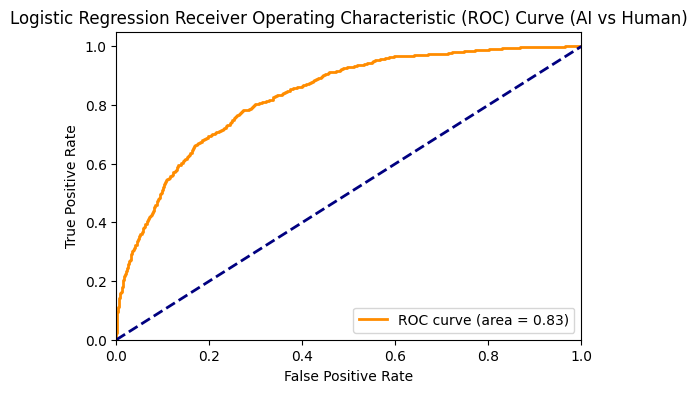


Training Support Vector Machine (Linear Kernel) for AI vs Human classification...
--- Results for Support Vector Machine (Linear Kernel) ---
Accuracy: 0.7368
Classification Report:
              precision    recall  f1-score   support

       Human       0.75      0.71      0.73      1250
         GPT       0.72      0.77      0.74      1250

    accuracy                           0.74      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.74      0.74      0.74      2500



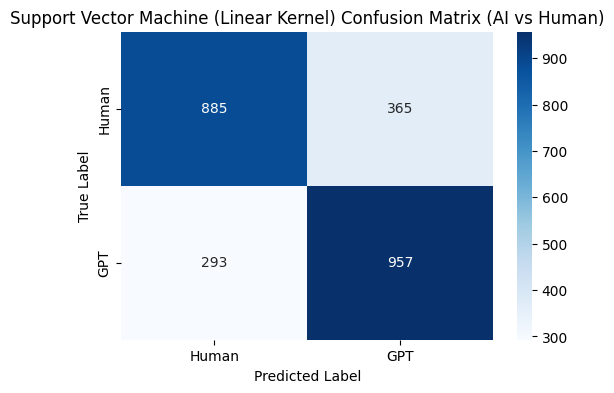

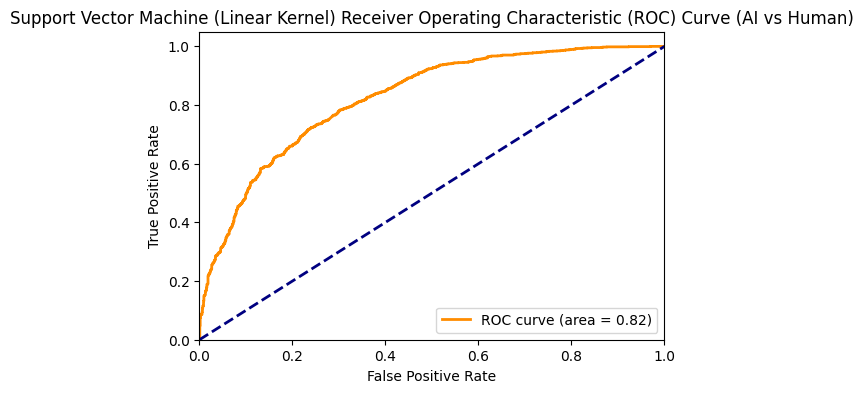


--- Optimal Model for AI vs Human ---
Based on AUC, the optimal model for AI vs Human classification is: Logistic Regression
Details:
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

       Human       0.77      0.72      0.74      1250
         GPT       0.73      0.78      0.76      1250

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.75      0.75      0.75      2500


--- Scenario 2: Fake vs Real News Classification Setup ---
fake_news_train.csv and fake_news_test.csv loaded successfully.

Training Multinomial Naive Bayes for Fake News classification...
--- Results for Multinomial Naive Bayes (Validation Set) ---
Accuracy: 0.8865
Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.93      0.89      2597
        Fake       0.92      0.85      0.88      2594

    accuracy                           0.89

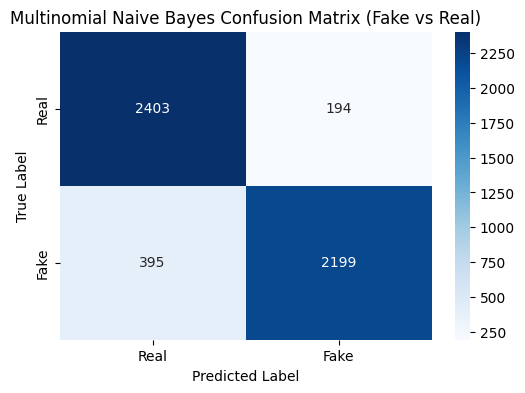

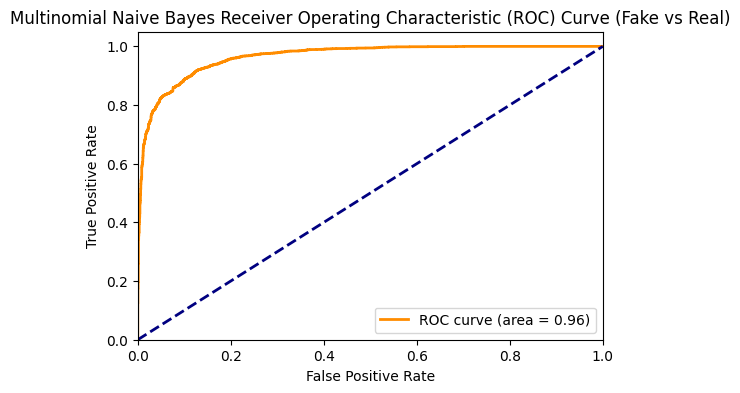


Training Logistic Regression for Fake News classification...
--- Results for Logistic Regression (Validation Set) ---
Accuracy: 0.9418
Classification Report:
              precision    recall  f1-score   support

        Real       0.95      0.93      0.94      2597
        Fake       0.93      0.95      0.94      2594

    accuracy                           0.94      5191
   macro avg       0.94      0.94      0.94      5191
weighted avg       0.94      0.94      0.94      5191



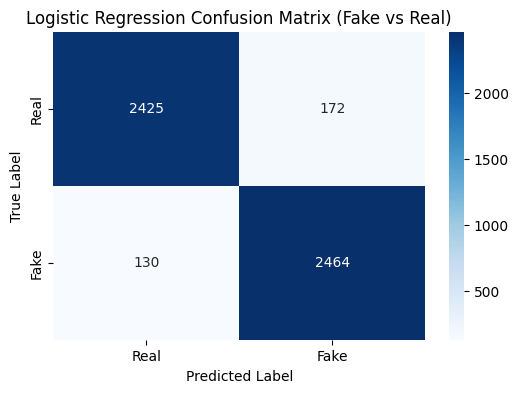

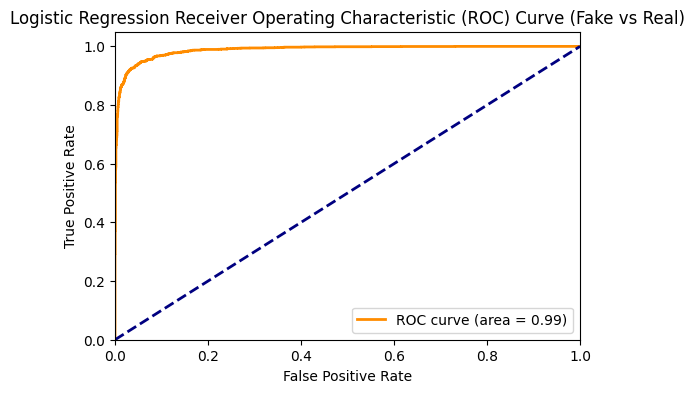


Training Support Vector Machine (Linear Kernel) for Fake News classification...
--- Results for Support Vector Machine (Linear Kernel) (Validation Set) ---
Accuracy: 0.9472
Classification Report:
              precision    recall  f1-score   support

        Real       0.95      0.94      0.95      2597
        Fake       0.94      0.95      0.95      2594

    accuracy                           0.95      5191
   macro avg       0.95      0.95      0.95      5191
weighted avg       0.95      0.95      0.95      5191



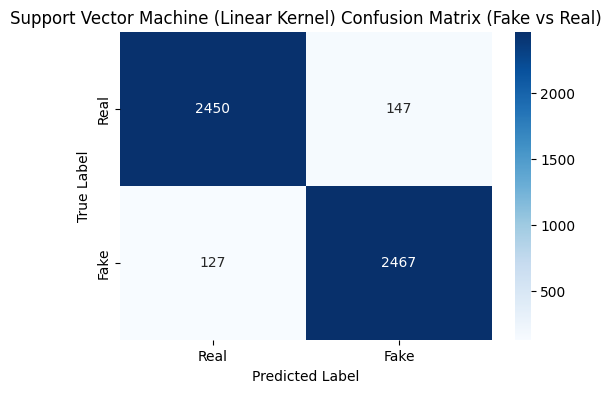

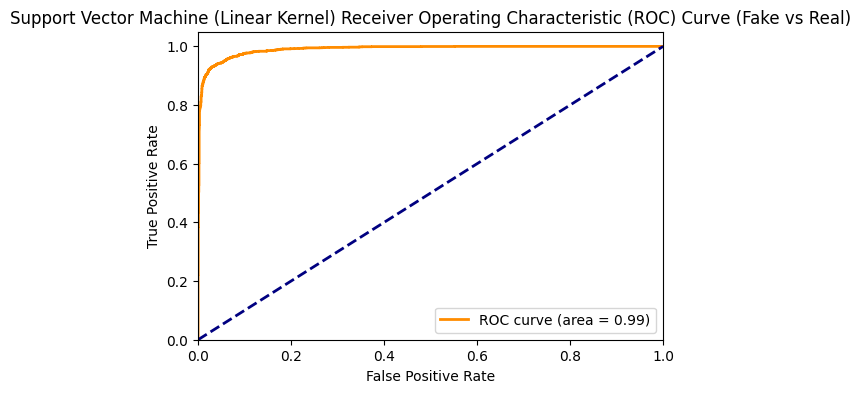


--- Optimal Model for Fake News ---
Based on AUC on the validation set, the optimal model for Fake News classification is: Support Vector Machine (Linear Kernel)
Details (Validation Set):
Accuracy: 0.9472
Classification Report:
              precision    recall  f1-score   support

        Real       0.95      0.94      0.95      2597
        Fake       0.94      0.95      0.95      2594

    accuracy                           0.95      5191
   macro avg       0.95      0.95      0.95      5191
weighted avg       0.95      0.95      0.95      5191


Retraining Support Vector Machine (Linear Kernel) on the entire Fake News training dataset...
Retraining complete.

Combined Analysis for: 'Zubimendi hasn't signed yet — still in limbo.'
  Fake News Detection:
    Predicted Type: Fake News
    Confidence: 0.8533
  AI Generation Detection:
    Predicted Origin: AI Generated
    Confidence: 0.5332

--- Predicting on the Fake News Test Dataset ---
Predictions for the test dataset:
           

In [ ]:
# prompt: collect all cells into this new one

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# %pip install transformers pandas numpy scikit-learn


# --- Scenario 1: AI vs Human Text Classification Setup ---
print("\n--- Scenario 1: AI vs Human Text Classification Setup ---")
# Load the datasets
try:
    gpt_df = pd.read_csv('DataSets/GPT.csv')
    human_df = pd.read_csv('DataSets/human.csv')
    print("GPT.csv and human.csv loaded successfully.")
except FileNotFoundError:
    print("Make sure GPT.csv and human.csv are in the current directory.")
    # Create dummy data if files are not found
    # print("Creating dummy data for AI vs Human demonstration.")
    # gpt_df = pd.DataFrame({'text': [f'This is a GPT generated sentence {i}.' for i in range(100)], 'label': 1})
    # human_df = pd.DataFrame({'text': [f'This is a human written sentence {i}.' for i in range(100)], 'label': 0})
    # print("Dummy AI vs Human data created.")


# Add labels: 1 for GPT (AI), 0 for Human
gpt_df['label'] = 1
human_df['label'] = 0

# Combine the datasets
df_ai = pd.concat([gpt_df, human_df], ignore_index=True)

# Handle potential missing values
df_ai.dropna(subset=['text'], inplace=True)

# Split data into training and testing sets for AI vs Human
X_train_ai, X_test_ai, y_train_ai, y_test_ai = train_test_split(df_ai['text'], df_ai['label'], test_size=0.25, random_state=42, stratify=df_ai['label'])

# Feature Extraction: Use TF-IDF for AI vs Human
vectorizer_ai = TfidfVectorizer(max_features=5000) # Consider top 5000 terms
X_train_tfidf_ai = vectorizer_ai.fit_transform(X_train_ai)
X_test_tfidf_ai = vectorizer_ai.transform(X_test_ai)


# Define three models for AI vs Human
models_ai = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (Linear Kernel)": SVC(kernel='linear', probability=True)
}

results_ai = {}

for name, model in models_ai.items():
  print(f"\nTraining {name} for AI vs Human classification...")
  model.fit(X_train_tfidf_ai, y_train_ai)
  y_pred_ai = model.predict(X_test_tfidf_ai)
  y_prob_ai = model.predict_proba(X_test_tfidf_ai)[:, 1] # Probability of the positive class (AI)

  accuracy_ai = accuracy_score(y_test_ai, y_pred_ai)
  report_ai = classification_report(y_test_ai, y_pred_ai, target_names=['Human', 'GPT'])
  cm_ai = confusion_matrix(y_test_ai, y_pred_ai)
  fpr_ai, tpr_ai, thresholds_ai = roc_curve(y_test_ai, y_prob_ai)
  roc_auc_ai = auc(fpr_ai, tpr_ai)

  results_ai[name] = {
      "accuracy": accuracy_ai,
      "report": report_ai,
      "confusion_matrix": cm_ai,
      "roc_curve": (fpr_ai, tpr_ai, thresholds_ai),
      "roc_auc": roc_auc_ai,
      "model": model # Store the trained model
  }

  print(f"--- Results for {name} ---")
  print(f"Accuracy: {accuracy_ai:.4f}")
  print("Classification Report:")
  print(report_ai)

  # Plot Heatmap (Confusion Matrix)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm_ai, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'GPT'], yticklabels=['Human', 'GPT'])
  plt.title(f'{name} Confusion Matrix (AI vs Human)')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # Plot ROC Curve
  plt.figure(figsize=(6, 4))
  plt.plot(fpr_ai, tpr_ai, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ai:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{name} Receiver Operating Characteristic (ROC) Curve (AI vs Human)')
  plt.legend(loc="lower right")
  plt.show()

# Determine Optimal Model for AI vs Human
print("\n--- Optimal Model for AI vs Human ---")
best_model_ai_name = max(results_ai, key=lambda k: results_ai[k]['roc_auc'])
model_ai = results_ai[best_model_ai_name]["model"]
print(f"Based on AUC, the optimal model for AI vs Human classification is: {best_model_ai_name}")
print("Details:")
print(f"Accuracy: {results_ai[best_model_ai_name]['accuracy']:.4f}")
print("Classification Report:")
print(results_ai[best_model_ai_name]['report'])

# --- Scenario 2: Fake vs Real News Classification Setup ---
print("\n--- Scenario 2: Fake vs Real News Classification Setup ---")
# Load the datasets
try:
  df_train_fake = pd.read_csv('DataSets/fake_news_train.csv')
  df_test_fake = pd.read_csv('DataSets/fake_news_test.csv') # Test set without labels for final prediction
  print("fake_news_train.csv and fake_news_test.csv loaded successfully.")
except FileNotFoundError:
  print("Make sure fake_news_train.csv and fake_news_test.csv are in the current directory.")
  # Create dummy data if files are not found
#   print("Creating dummy data for Fake News demonstration.")
#   df_train_fake = pd.DataFrame({
#       'text': [f'Real news story {i}.' for i in range(100)] + [f'Fake news sensational headline {i}.' for i in range(100)],
#       'label': [0] * 100 + [1] * 100
#       })
#   df_test_fake = pd.DataFrame({
#       'text': [f'Another news story {i}.' for i in range(50)] # Test set without labels
#       })
#   print("Dummy Fake News data created.")

# Preprocessing
# Drop missing values in training data
df_train_fake.dropna(subset=['text', 'label'], inplace=True)
# Drop missing values in test data text (we will predict labels)
df_test_fake.dropna(subset=['text'], inplace=True)


# Define features (X) and target (y) for fake news training
X_train_fake = df_train_fake['text']
y_train_fake = df_train_fake['label']
X_test_fake = df_test_fake['text'] # Text from the test set for final prediction

# Feature Extraction: Use TF-IDF for Fake News
vectorizer_fake_news = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf_fake = vectorizer_fake_news.fit_transform(X_train_fake)
X_test_tfidf_fake = vectorizer_fake_news.transform(X_test_fake) # Transform test data for final prediction

# Split fake news training data for internal validation for model selection
X_train_fake_split, X_val_fake_split, y_train_fake_split, y_val_fake_split = train_test_split(
    X_train_tfidf_fake, y_train_fake, test_size=0.25, random_state=42, stratify=y_train_fake
)

# Define three models for fake news
models_fake = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (Linear Kernel)": SVC(kernel='linear', probability=True)
}

results_fake = {}

for name, model in models_fake.items():
  print(f"\nTraining {name} for Fake News classification...")
  model.fit(X_train_fake_split, y_train_fake_split)
  y_pred_fake = model.predict(X_val_fake_split)
  y_prob_fake = model.predict_proba(X_val_fake_split)[:, 1] # Probability of the positive class (Fake)

  accuracy_fake = accuracy_score(y_val_fake_split, y_pred_fake)
  report_fake = classification_report(y_val_fake_split, y_pred_fake, target_names=['Real', 'Fake'])
  cm_fake = confusion_matrix(y_val_fake_split, y_pred_fake)
  fpr_fake, tpr_fake, thresholds_fake = roc_curve(y_val_fake_split, y_prob_fake)
  roc_auc_fake = auc(fpr_fake, tpr_fake)

  results_fake[name] = {
      "accuracy": accuracy_fake,
      "report": report_fake,
      "confusion_matrix": cm_fake,
      "roc_curve": (fpr_fake, tpr_fake, thresholds_fake),
      "roc_auc": roc_auc_fake,
      "model": model # Store the trained model
  }

  print(f"--- Results for {name} (Validation Set) ---")
  print(f"Accuracy: {accuracy_fake:.4f}")
  print("Classification Report:")
  print(report_fake)

  # Plot Heatmap (Confusion Matrix)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm_fake, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
  plt.title(f'{name} Confusion Matrix (Fake vs Real)')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # Plot ROC Curve
  plt.figure(figsize=(6, 4))
  plt.plot(fpr_fake, tpr_fake, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_fake:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'{name} Receiver Operating Characteristic (ROC) Curve (Fake vs Real)')
  plt.legend(loc="lower right")
  plt.show()

# Determine Optimal Model for Fake News
print("\n--- Optimal Model for Fake News ---")
best_model_fake_name = max(results_fake, key=lambda k: results_fake[k]['roc_auc'])
model_fake_news = results_fake[best_model_fake_name]["model"]
print(f"Based on AUC on the validation set, the optimal model for Fake News classification is: {best_model_fake_name}")
print("Details (Validation Set):")
print(f"Accuracy: {results_fake[best_model_fake_name]['accuracy']:.4f}")
print("Classification Report:")
print(results_fake[best_model_fake_name]['report'])

# Retrain the best fake news model on the *entire* fake news training data for final use
print(f"\nRetraining {best_model_fake_name} on the entire Fake News training dataset...")
model_fake_news.fit(X_train_tfidf_fake, y_train_fake)
print("Retraining complete.")


# --- Save the best models and vectorizers for Flask app usage ---
import joblib
joblib.dump(model_fake_news, f'Models/best_model_fake_news_tfidf_{results_fake[best_model_fake_name]["accuracy"]:.4f}.joblib')
joblib.dump(vectorizer_fake_news, 'Models/tfidf_vectorizer_fake_news.joblib')
joblib.dump(model_ai, f'Models/best_model_ai_generated_content_tfidf_{results_ai[best_model_ai_name]["accuracy"]:.4f}.joblib')
joblib.dump(vectorizer_ai, 'Models/tfidf_vectorizer_ai_generated_content.joblib')


# --- Combined Analysis using Optimal Models ---

def analyze_text_optimal(text):
    """
    Analyzes the input text to determine if it's fake/real news and AI-generated/human-written
    using the determined optimal models.

    Args:
        text (str): The input text to analyze.

    Returns:
        dict: A dictionary containing the analysis results:
            - 'fake_news': 'Fake News' or 'Real News'
            - 'fake_news_confidence': Confidence score for the fake news prediction
            - 'ai_generated': 'AI Generated' or 'Human Written'
            - 'ai_generated_confidence': Confidence score for the AI generation prediction
    """
    # --- Fake News Detection ---
    text_tfidf_fake_news = vectorizer_fake_news.transform([text])

    # Get predictions and probabilities from the optimal fake news model
    fake_news_prediction_proba = model_fake_news.predict_proba(text_tfidf_fake_news)
    fake_news_predicted_label = model_fake_news.predict(text_tfidf_fake_news)[0]

    # Assuming 0 is Real and 1 is Fake for fake news model based on typical datasets
    fake_news_class_name = "Fake News" if fake_news_predicted_label == 1 else "Real News"
    # Probability of the predicted class
    fake_news_confidence = fake_news_prediction_proba[0][fake_news_predicted_label]


    # --- AI Generation Detection ---
    text_tfidf_ai = vectorizer_ai.transform([text])

    # Get predictions and probabilities from the optimal AI detection model
    ai_prediction_proba = model_ai.predict_proba(text_tfidf_ai)
    ai_predicted_label = model_ai.predict(text_tfidf_ai)[0]

    # Assuming 1 for AI and 0 for Human for AI detection model
    ai_generated_class_name = "AI Generated" if ai_predicted_label == 1 else "Human Written"
    # Probability of the predicted class
    ai_generated_confidence = ai_prediction_proba[0][ai_predicted_label]


    return {
        'fake_news': fake_news_class_name,
        'fake_news_confidence': fake_news_confidence,
        'ai_generated': ai_generated_class_name,
        'ai_generated_confidence': ai_generated_confidence
    }

# Get user input for combined analysis
user_input_combined = input("\nEnter text to analyze (Combined Analysis): ")

# Analyze the text using the optimal models
analysis_results_combined = analyze_text_optimal(user_input_combined)

# Display the results
print(f"\nCombined Analysis for: '{user_input_combined}'")
print(f"  Fake News Detection:")
print(f"    Predicted Type: {analysis_results_combined['fake_news']}")
print(f"    Confidence: {analysis_results_combined['fake_news_confidence']:.4f}")
print(f"  AI Generation Detection:")
print(f"    Predicted Origin: {analysis_results_combined['ai_generated']}")
print(f"    Confidence: {analysis_results_combined['ai_generated_confidence']:.4f}")


# --- Predict on the Fake News Test Set (if df_test_fake exists) ---
if 'df_test_fake' in locals() and not df_test_fake.empty:
  print("\n--- Predicting on the Fake News Test Dataset ---")
  y_pred_test_fake = model_fake_news.predict(X_test_tfidf_fake)

  # Create a DataFrame with original test data and predictions
  results_df_fake_test = df_test_fake.copy()
  results_df_fake_test['predicted_label'] = y_pred_test_fake

  # Map labels to more understandable names (0 for Real, 1 for Fake)
  label_map_fake = {0: 'Real', 1: 'Fake'}
  results_df_fake_test['predicted_label_name'] = results_df_fake_test['predicted_label'].map(label_map_fake)

  print("Predictions for the test dataset:")
  print(results_df_fake_test[['text', 'predicted_label_name']].head())
else:
  print("\nNo fake news test dataset available for final prediction.")


In [ ]:
# --- User Input and Analysis (Run this cell only for predictions) ---
user_input = input("Enter text to analyze: ")

def analyze_text(text):
    text_tfidf_fake_news = vectorizer_fake_news.transform([text])
    fake_news_prediction_proba = model_fake_news.predict_proba(text_tfidf_fake_news)
    fake_news_predicted_label = model_fake_news.predict(text_tfidf_fake_news)[0]
    fake_news_class_name = "Fake News" if fake_news_predicted_label == 1 else "Real News"
    fake_news_confidence = fake_news_prediction_proba[0][fake_news_predicted_label]

    text_tfidf_ai = vectorizer_ai.transform([text])
    ai_prediction_proba = model_ai.predict_proba(text_tfidf_ai)
    ai_predicted_label = model_ai.predict(text_tfidf_ai)[0]
    ai_generated_class_name = "AI Generated" if ai_predicted_label == 1 else "Human Written"
    ai_generated_confidence = ai_prediction_proba[0][ai_predicted_label]

    return {
        'fake_news': fake_news_class_name,
        'fake_news_confidence': fake_news_confidence,
        'ai_generated': ai_generated_class_name,
        'ai_generated_confidence': ai_generated_confidence
    }

results = analyze_text(user_input)
print(f"\nCombined Analysis for: '{user_input}'")
print(f"  Fake News Detection: {results['fake_news']} (Confidence: {results['fake_news_confidence']:.4f})")
print(f"  AI Generation Detection: {results['ai_generated']} (Confidence: {results['ai_generated_confidence']:.4f})")
